# Camunda 8 Workers:
## Power Consumption at Startup, Stop And Idle
This measurement is based on the shell-script ```start_worker_script_sequential.sh``` in ```shell-scripts/```

### Measurements 
- 60 cycles and 0 base workers starting **2023-12-10 02:56:00**
- 30 cycles and 1 base worker starting **2023-12-10 09:53:00**

Scrape interval is 10 seconds

### Worker settings
maxJobsActive: 32
pollInterval: 2s
timeout: 45s
requestTimeout: 60s

## Concept
Measurement window is **5 minutes**, each minute should be looked at seperately:
- **Min1** Starting the worker
- **Min2** Idle with started worker # 1
- **Min3** Idle with started worker # 2
- **Min4** Shutting down worker
- **Min5** Idle before starting next worker

### Idle
- Considering the average of all: 
    - **Min2** / **BASE_WORKERS** + 1 
    - **Min3** / **BASE_WORKERS** + 1 
    - **Min5** / **BASE_WORKERS**

### Start
- Considering **Min1** and the difference to **Idle** * **BASE_WORKER**

### Stop

- Considering **Min4** and the difference to **Idle** * **BASE_WORKER**

*11.12.23, Author: Jan Wittrowski*

Cheatsheet

```df.loc[row, col]```

Sum up the first three cells of each column
sum_first_three = df.iloc[:3].sum()


## Importing, Preparation

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOG_PATH = "shell-scripts/logs/"
LOG_NAME = "2023-12-10-02-53-00-STARTS"

#read first CSV
rawdata = pd.read_csv("CSV/Start_Stop_Sequential_01_1_ALL.csv", 
                     header=1, # which row contains column headers
                     index_col=0   ) # which column contains labels

#read starting times
with open(LOG_PATH+LOG_NAME, "r") as file:
    start_times = file.readlines()

# remove newline-character, 
for i, time in enumerate(start_times):
    start_times[i] = time[:-1]


start_times

['2023-12-10 02:56:00',
 '2023-12-10 03:01:00',
 '2023-12-10 03:06:00',
 '2023-12-10 03:11:00',
 '2023-12-10 03:16:00',
 '2023-12-10 03:21:00',
 '2023-12-10 03:26:00',
 '2023-12-10 03:31:00',
 '2023-12-10 03:36:00',
 '2023-12-10 03:41:00',
 '2023-12-10 03:46:00',
 '2023-12-10 03:51:00',
 '2023-12-10 03:56:00',
 '2023-12-10 04:01:00',
 '2023-12-10 04:06:00',
 '2023-12-10 04:11:00',
 '2023-12-10 04:16:00',
 '2023-12-10 04:21:00',
 '2023-12-10 04:26:00',
 '2023-12-10 04:31:00',
 '2023-12-10 04:36:00',
 '2023-12-10 04:41:00',
 '2023-12-10 04:46:00',
 '2023-12-10 04:51:00',
 '2023-12-10 04:56:00',
 '2023-12-10 05:01:00',
 '2023-12-10 05:06:00',
 '2023-12-10 05:11:00',
 '2023-12-10 05:16:00',
 '2023-12-10 05:21:00',
 '2023-12-10 05:26:00',
 '2023-12-10 05:31:00',
 '2023-12-10 05:36:00',
 '2023-12-10 05:41:00',
 '2023-12-10 05:46:00',
 '2023-12-10 05:51:00',
 '2023-12-10 05:56:00',
 '2023-12-10 06:01:00',
 '2023-12-10 06:06:00',
 '2023-12-10 06:11:00',
 '2023-12-10 06:16:00',
 '2023-12-10 06:

In [272]:
# remove irrelevant columns: 

columns_to_keep = rawdata.columns[~rawdata.columns.str.contains('OTHER|measuring-endpoints|monitoring|console-worker|tasklist|operate|bpmndeployment|processstart|elasticsearch|connectors|load-controller')]
data = rawdata.loc[:, columns_to_keep]

data

,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,coredns-77ccd57875-qkp4q / kube-system / PKG,helm-install-traefik-crd-hzktt / kube-system / PKG,helm-install-traefik-ncp5n / kube-system / PKG,local-path-provisioner-957fdf8bc-jnlfw / kube-system / PKG,metrics-server-648b5df564-msqlc / kube-system / PKG,svclb-traefik-5671c552-795qx / kube-system / PKG,traefik-768bdcdcdd-4f8ms / kube-system / PKG,system_processes / system / PKG,...,restworkerjava-7df67bc98-tjr6p / worker / DRAM,restworkerjava-7df67bc98-tnjrl / worker / DRAM,restworkerjava-7df67bc98-vjw7q / worker / DRAM,restworkerjava-7df67bc98-vpmzh / worker / DRAM,restworkerjava-7df67bc98-vvrzq / worker / DRAM,restworkerjava-7df67bc98-w6fbz / worker / DRAM,restworkerjava-7df67bc98-wjgd4 / worker / DRAM,restworkerjava-7df67bc98-wp87h / worker / DRAM,restworkerjava-7df67bc98-x86sg / worker / DRAM,restworkerjava-7df67bc98-zwbg7 / worker / DRAM
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-10 02:56:00,0.852,0.290,0.170,0.161,0.161,0.164,0.177,0.322,0.162,0.632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 02:56:10,3.750,0.886,0.253,0.213,0.213,0.224,0.290,0.427,0.222,4.480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 02:56:20,2.380,0.585,0.179,0.157,0.157,0.163,0.207,0.313,0.160,1.890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 02:56:30,1.130,0.343,0.167,0.157,0.157,0.160,0.179,0.313,0.158,0.803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 02:56:40,0.968,0.357,0.219,0.209,0.209,0.212,0.230,0.418,0.211,0.865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-10 07:55:20,0.856,0.292,0.168,0.161,0.161,0.163,0.178,0.322,0.162,0.739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 07:55:30,1.620,0.428,0.177,0.161,0.161,0.166,0.197,0.322,0.162,1.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 07:55:40,1.200,0.401,0.227,0.215,0.215,0.219,0.241,0.430,0.216,1.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# extract measurements. use list of start_times and measurements_per_cycle (amount of datapoints)
def split_data_into_cycles(df, start_times, measurements_per_cycle):
    cycles = []
    # Select all rows belonging to a cycle
    for item in start_times:
        temp = pd.DataFrame()

        index = df.index.get_loc(item)

        temp = df.iloc[index:index + measurements_per_cycle,:]
        temp = temp.dropna(how="all", axis=1)

        cycles.append(temp)
    
    return cycles;

# every Cycle with 30 measurements is 1 entry in list
STEPS_PER_CYCLE = 30 # 5 Min * 6 Scrapes/Min

cycles = split_data_into_cycles(data, start_times,STEPS_PER_CYCLE)

In [274]:
# read namespaces from columns. 
# This relies on grafana CSV-outputs using '/' as a divider: "pod / namespace / domain"
def extract_namespaces(df):
    namespaces = []
    for col in df.columns:
        split_col = col.split('/')
        if len(split_col) > 1:
            namespace = split_col[1].strip()
            if namespace not in namespaces:
                namespaces.append(namespace)
    return namespaces;


In [275]:
# for each cycle, group all pods from namespace
def group_namespaces_per_cycle(cycles):
    grouped_cycles = []
    namespaces = extract_namespaces(data)

    for item in cycles:
        temp = pd.DataFrame()

        for namespace in namespaces:
            namespace_cols = [col for col in item.columns if namespace in col]
            temp[namespace] = item[namespace_cols].sum(axis=1)  

        grouped_cycles.append(temp)
    
    return grouped_cycles;


cycles_by_namespace = group_namespaces_per_cycle(cycles)

In [276]:
# create relative timestamps

def create_relative_timestamps(min, max, interval):
    elapsed_times = []
    for i in range(min,int(max/interval)):
        s = i * interval % 60
        m = int(i / (60 / interval))
        elapsed_times.append("{:02d}:{:02d}".format(m,s))

    return elapsed_times;

elapsed_times = create_relative_timestamps(0, 300, 10)

# elapsed_times


In [277]:
# create single dataframe for namespace for better readability
def isolate_namespace_per_cycle(namespace, cycles_list):
    df = pd.DataFrame(index=elapsed_times)
    
    for item in cycles_list:
        temp = item[namespace]
        temp.index = elapsed_times
        
        df[item.index[0]] = temp
    
    return df;

all_camunda_series = isolate_namespace_per_cycle("camunda8", cycles_by_namespace)
all_system_series = isolate_namespace_per_cycle("system", cycles_by_namespace)
all_worker_series = isolate_namespace_per_cycle("worker", cycles_by_namespace)
all_kube_system_series = isolate_namespace_per_cycle("kube-system", cycles_by_namespace)

<Axes: title={'center': 'System'}, xlabel='Time', ylabel='Consumed Power [W]'>

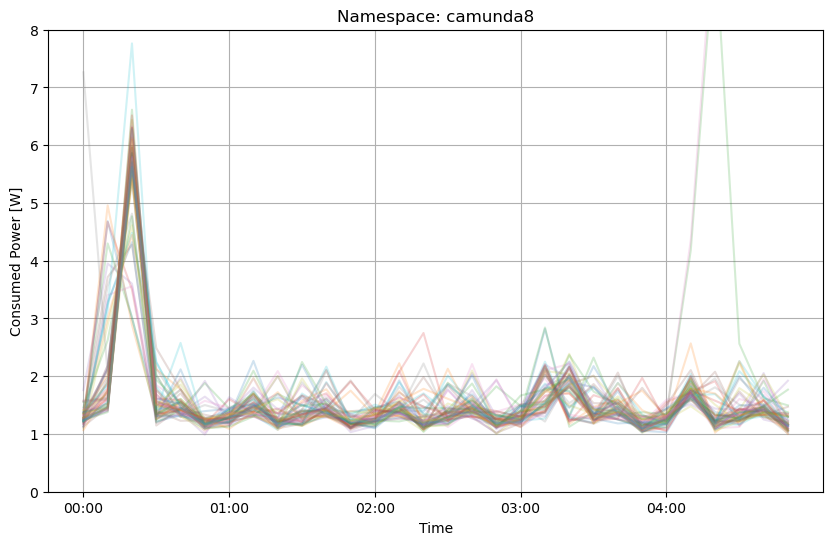

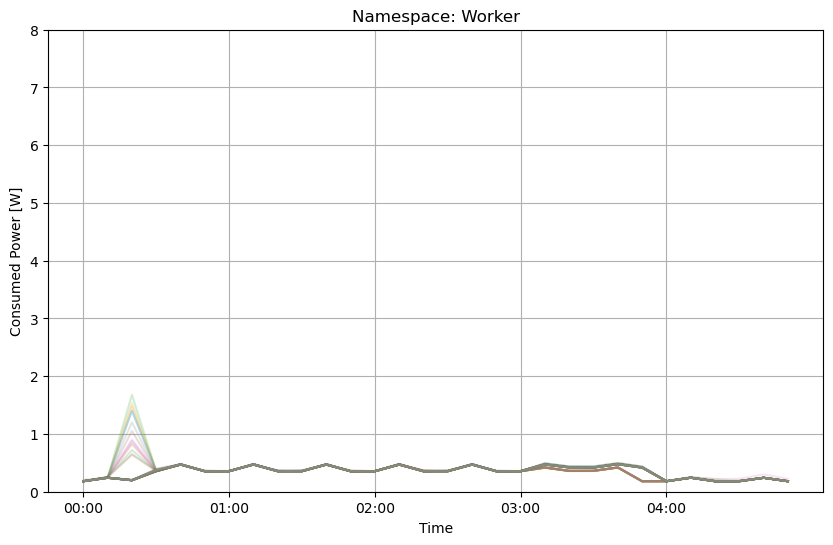

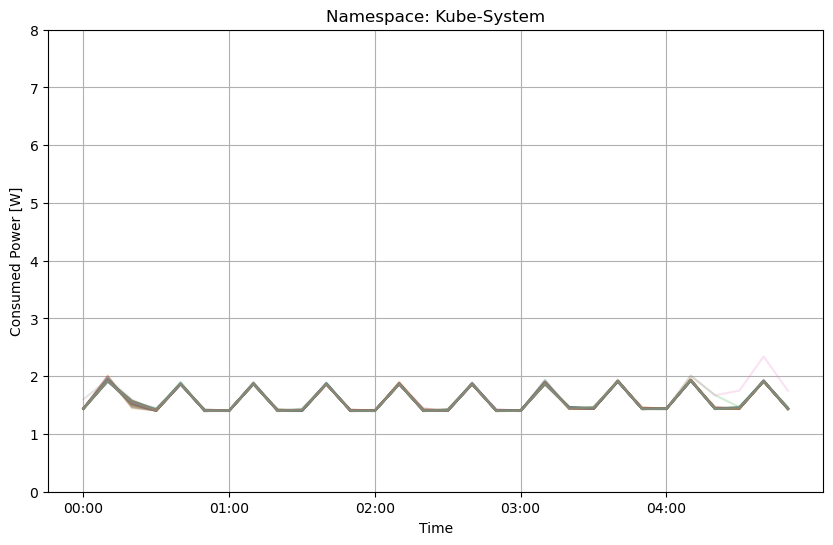

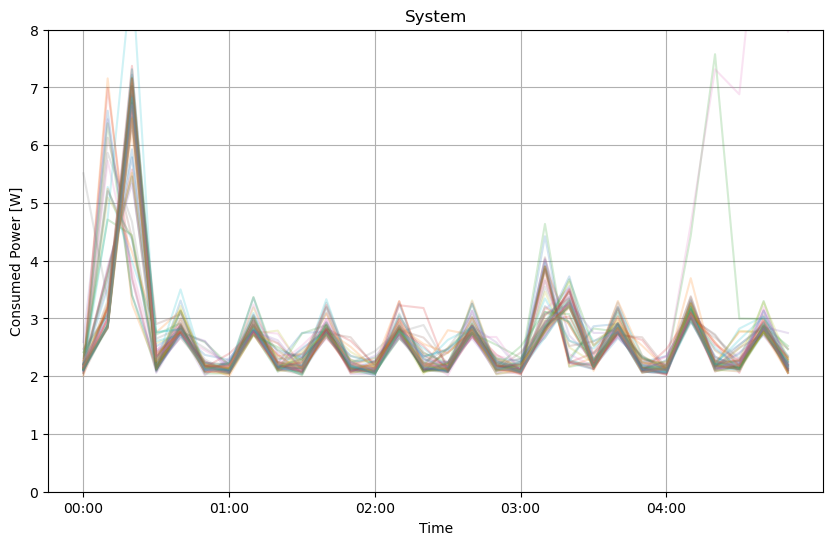

In [278]:
# plot results
ylim=[0,8] 
figsize = [10,6]
alpha=0.2
x_ticks = [0,6,12,18,24]
grid=True

all_camunda_series.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: camunda8", xlabel='Time', ylabel='Consumed Power [W]')
all_worker_series.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: Worker", xlabel='Time', ylabel='Consumed Power [W]')
all_kube_system_series.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: Kube-System", xlabel='Time', ylabel='Consumed Power [W]')
all_system_series.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "System", xlabel='Time', ylabel='Consumed Power [W]')

## Identifying Outliers

<Axes: title={'center': 'Each Cycle in Minute 5'}>

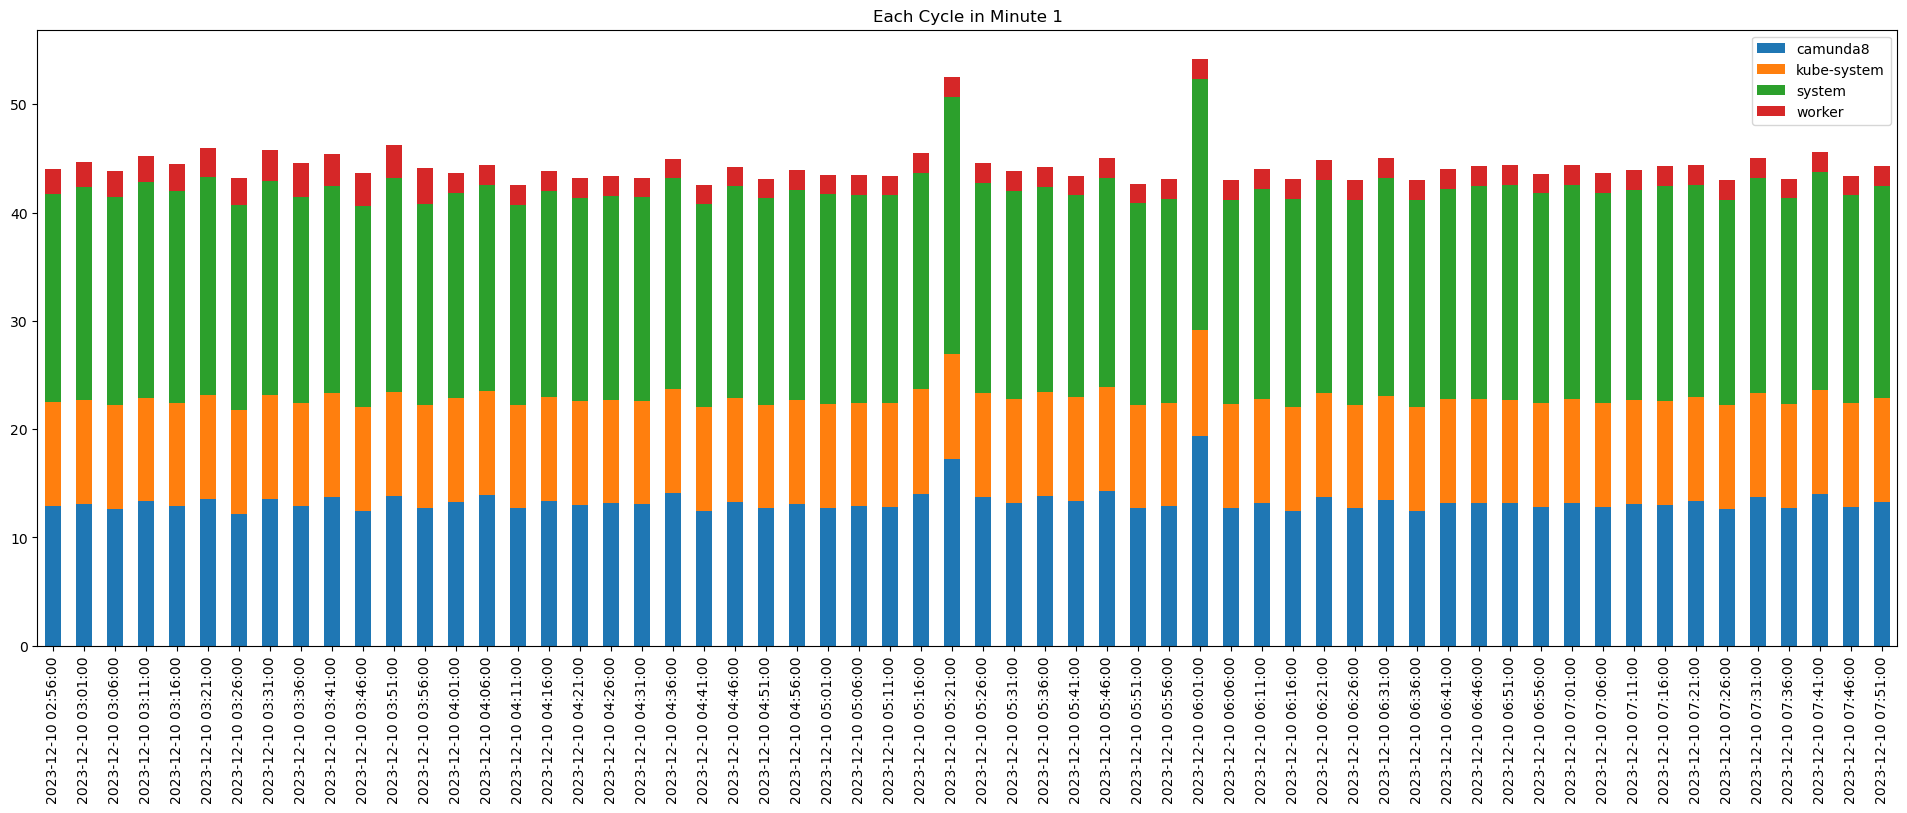

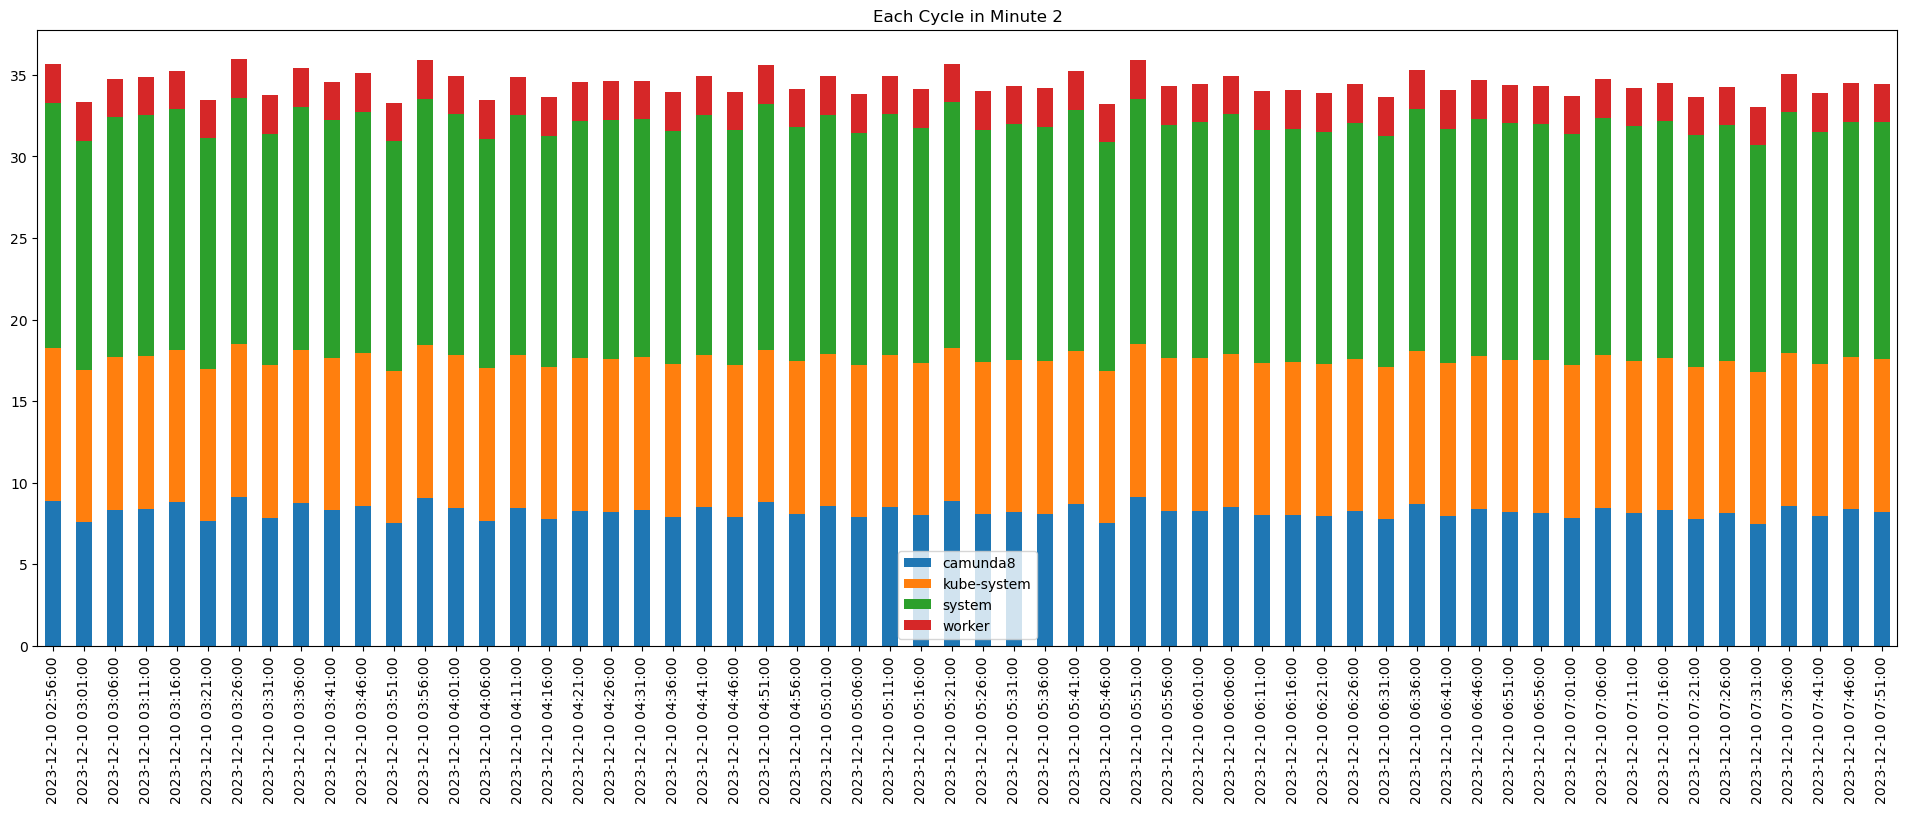

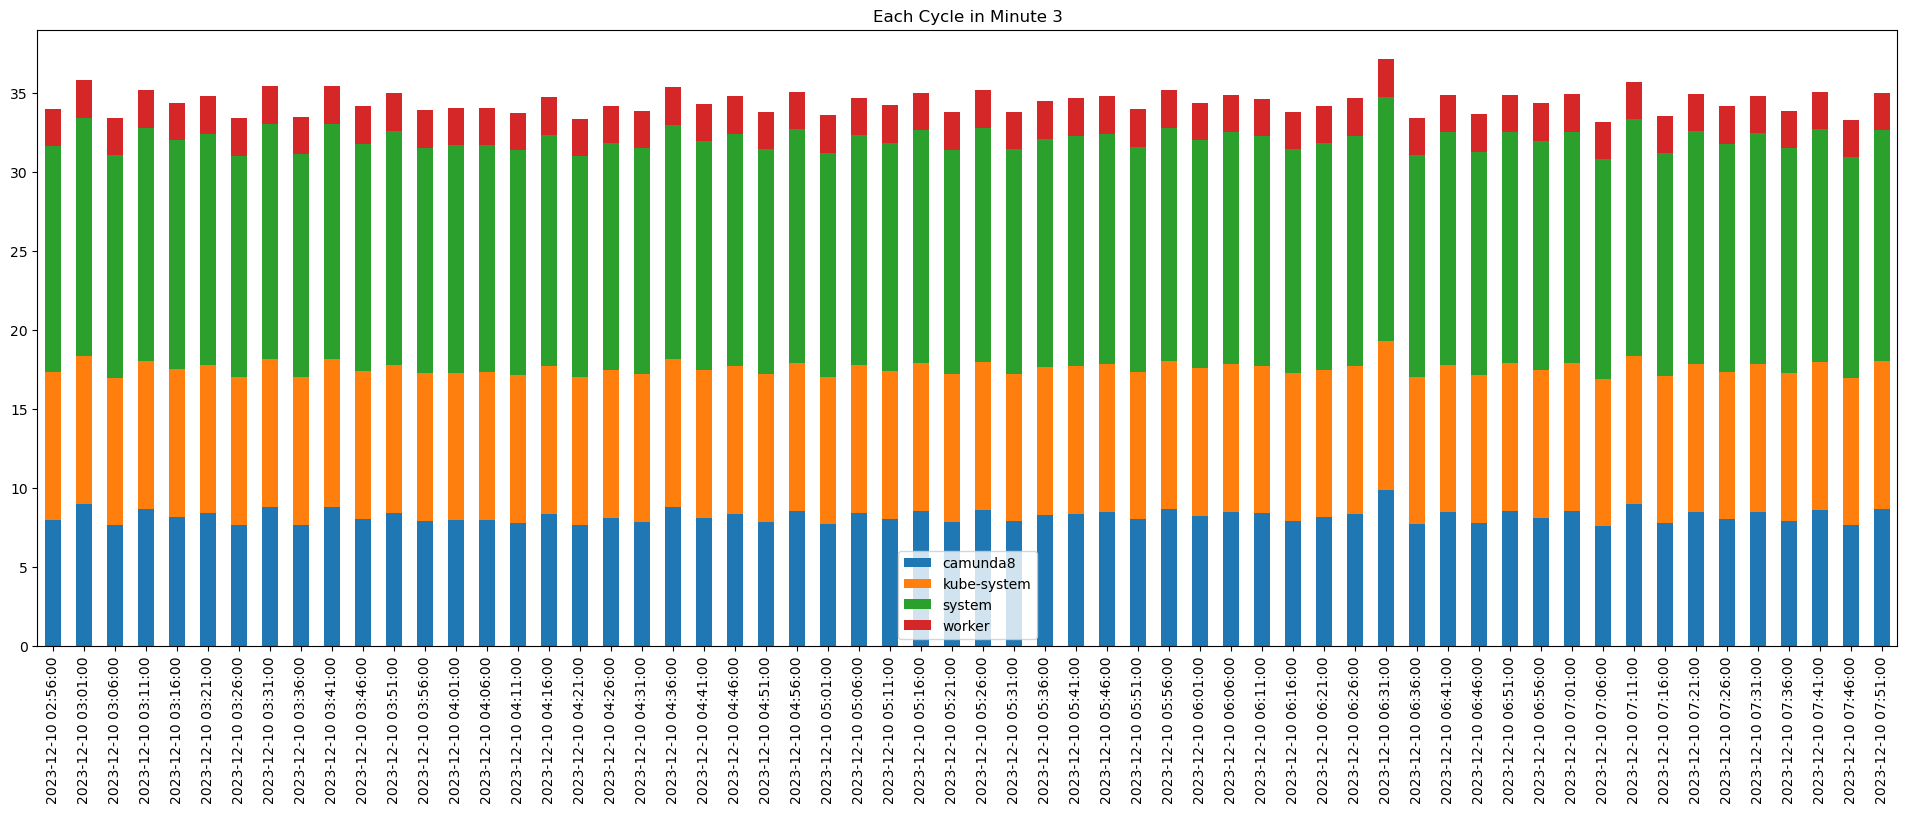

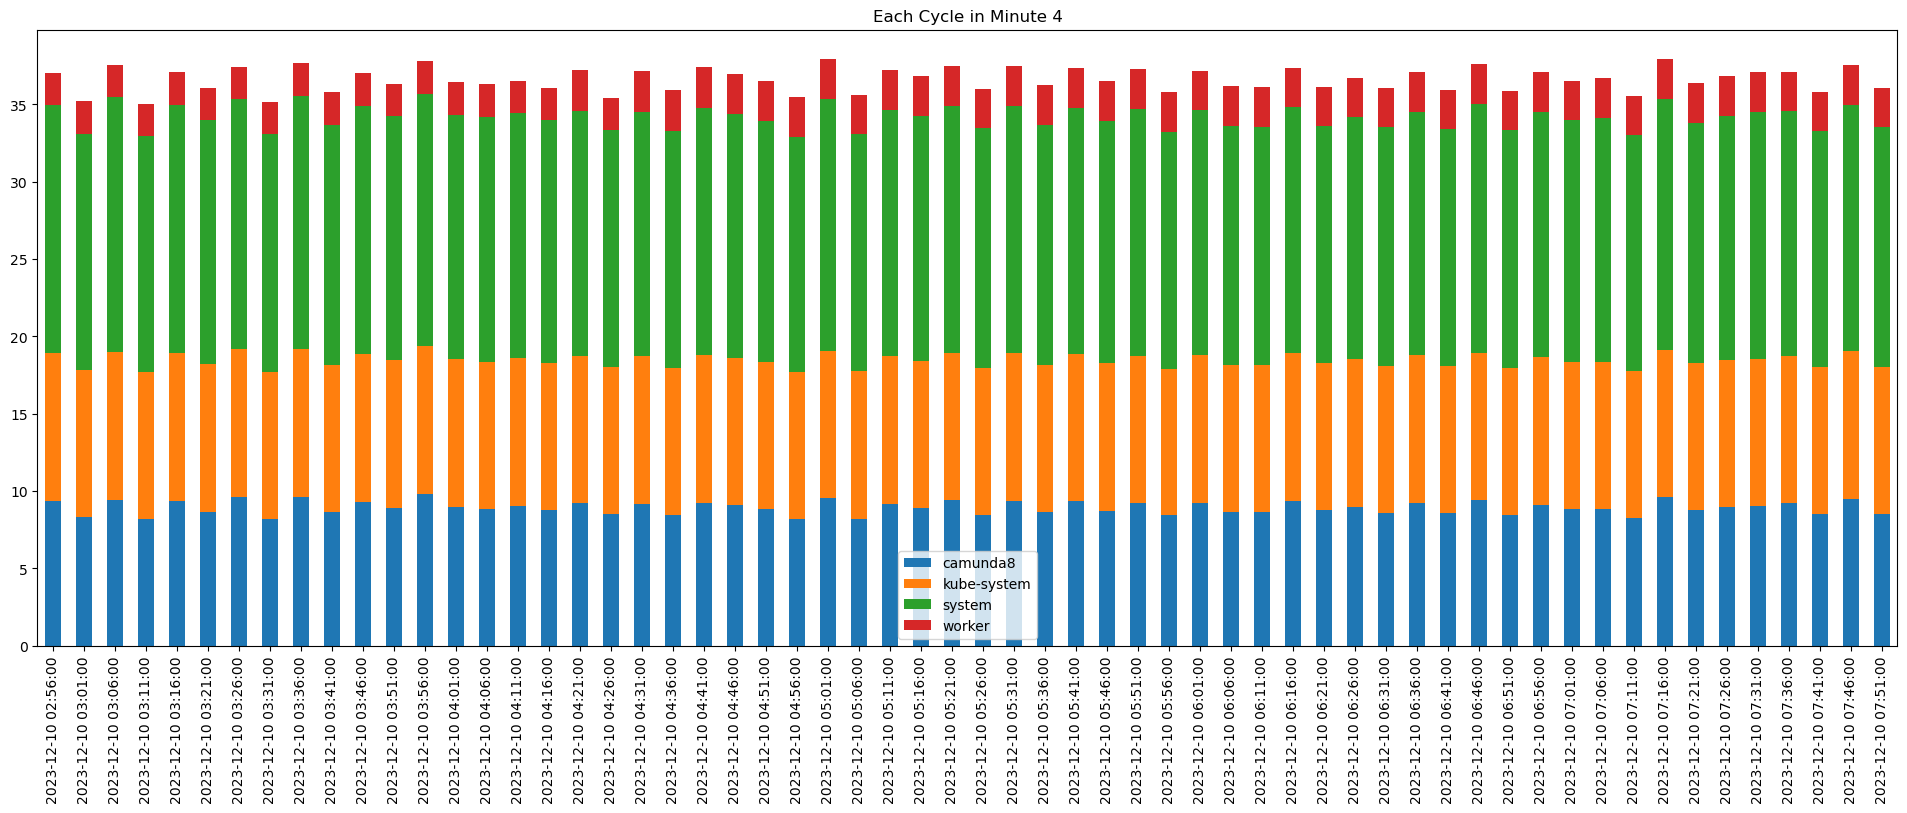

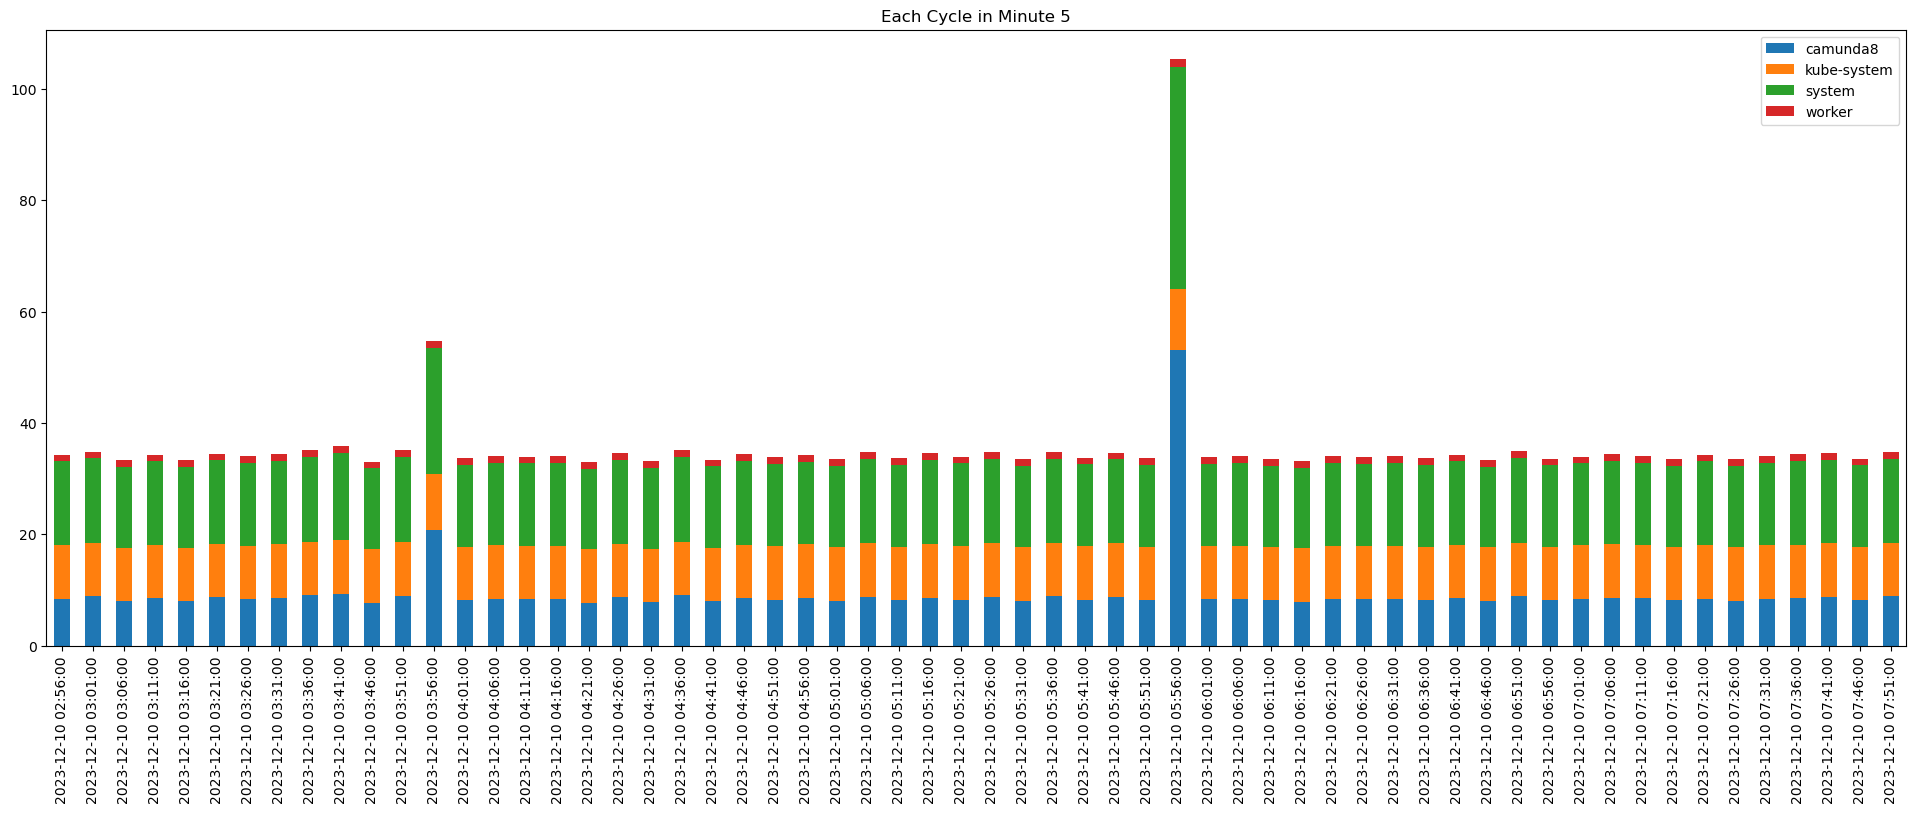

In [279]:
# create sums by minute

def create_min_by_namespace(cycles_by_namespace, min):
    min_by_namespace = pd.DataFrame()
    index=create_relative_timestamps(0,60,10)
    for item in cycles_by_namespace:
        min_by_namespace[item.index[0]] = pd.DataFrame(item.iloc[ (min - 1) * 6 : min * 6 ,:]).sum(axis=0)
        
    min_by_namespace = min_by_namespace.transpose()
    return min_by_namespace

min1_by_namespace = create_min_by_namespace(cycles_by_namespace,1)
min2_by_namespace = create_min_by_namespace(cycles_by_namespace,2)
min3_by_namespace = create_min_by_namespace(cycles_by_namespace,3)
min4_by_namespace = create_min_by_namespace(cycles_by_namespace,4)
min5_by_namespace = create_min_by_namespace(cycles_by_namespace,5)

min1_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 1")
min2_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 2")
min3_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 3")
min4_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 4")
min5_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 5")

#### Outliers:

**Min1**

- '2023-12-10 05:21:00'
- '2023-12-10 06:01:00'

**Min5**

- '2023-12-10 05:56:00'
- '2023-12-10 03:56:00'

#### Cleaning up

In [280]:
# drop outliers from rawdata
outliers = [
    '2023-12-10 05:56:00', 
    '2023-12-10 03:56:00',
    '2023-12-10 05:21:00',
    '2023-12-10 06:01:00'
]

start_times_clean = [time for time in start_times if time not in outliers]

In [281]:
cycles_clean = split_data_into_cycles(data, start_times_clean,STEPS_PER_CYCLE)
cycles_by_namespace_clean = group_namespaces_per_cycle(cycles_clean)

all_camunda_series_clean = isolate_namespace_per_cycle("camunda8", cycles_by_namespace_clean)
all_system_series_clean = isolate_namespace_per_cycle("system", cycles_by_namespace_clean)
all_worker_series_clean = isolate_namespace_per_cycle("worker", cycles_by_namespace_clean)
all_kube_system_series_clean = isolate_namespace_per_cycle("kube-system", cycles_by_namespace_clean)

<Axes: title={'center': 'Each Cycle in Minute 5 - cleaned'}>

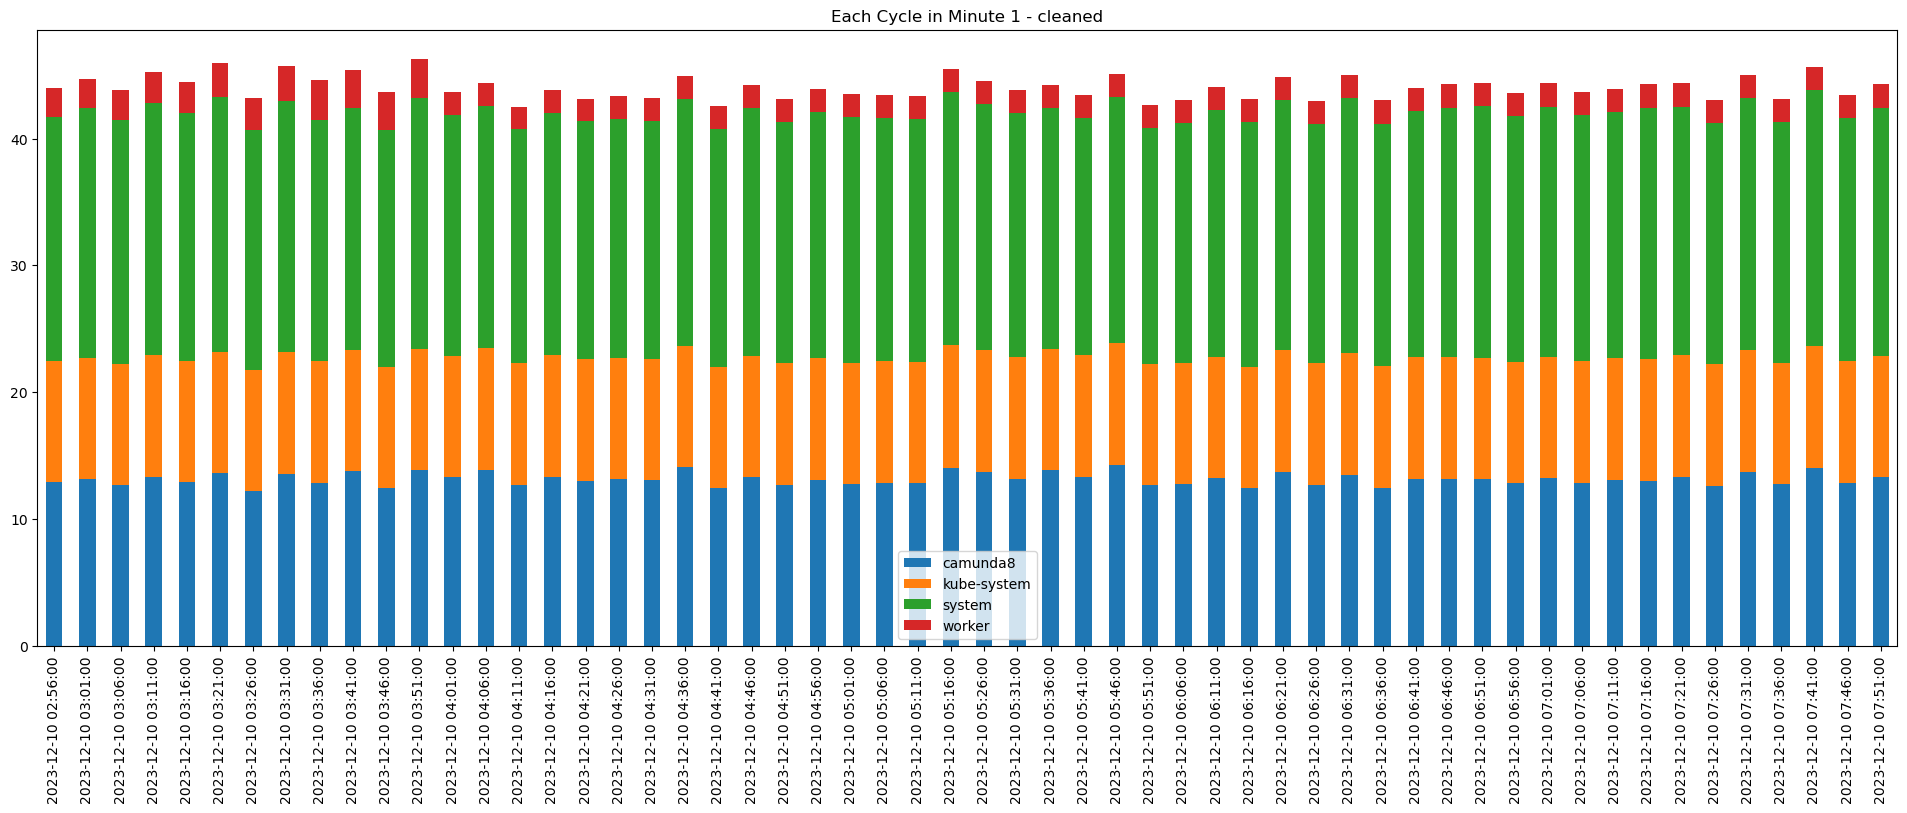

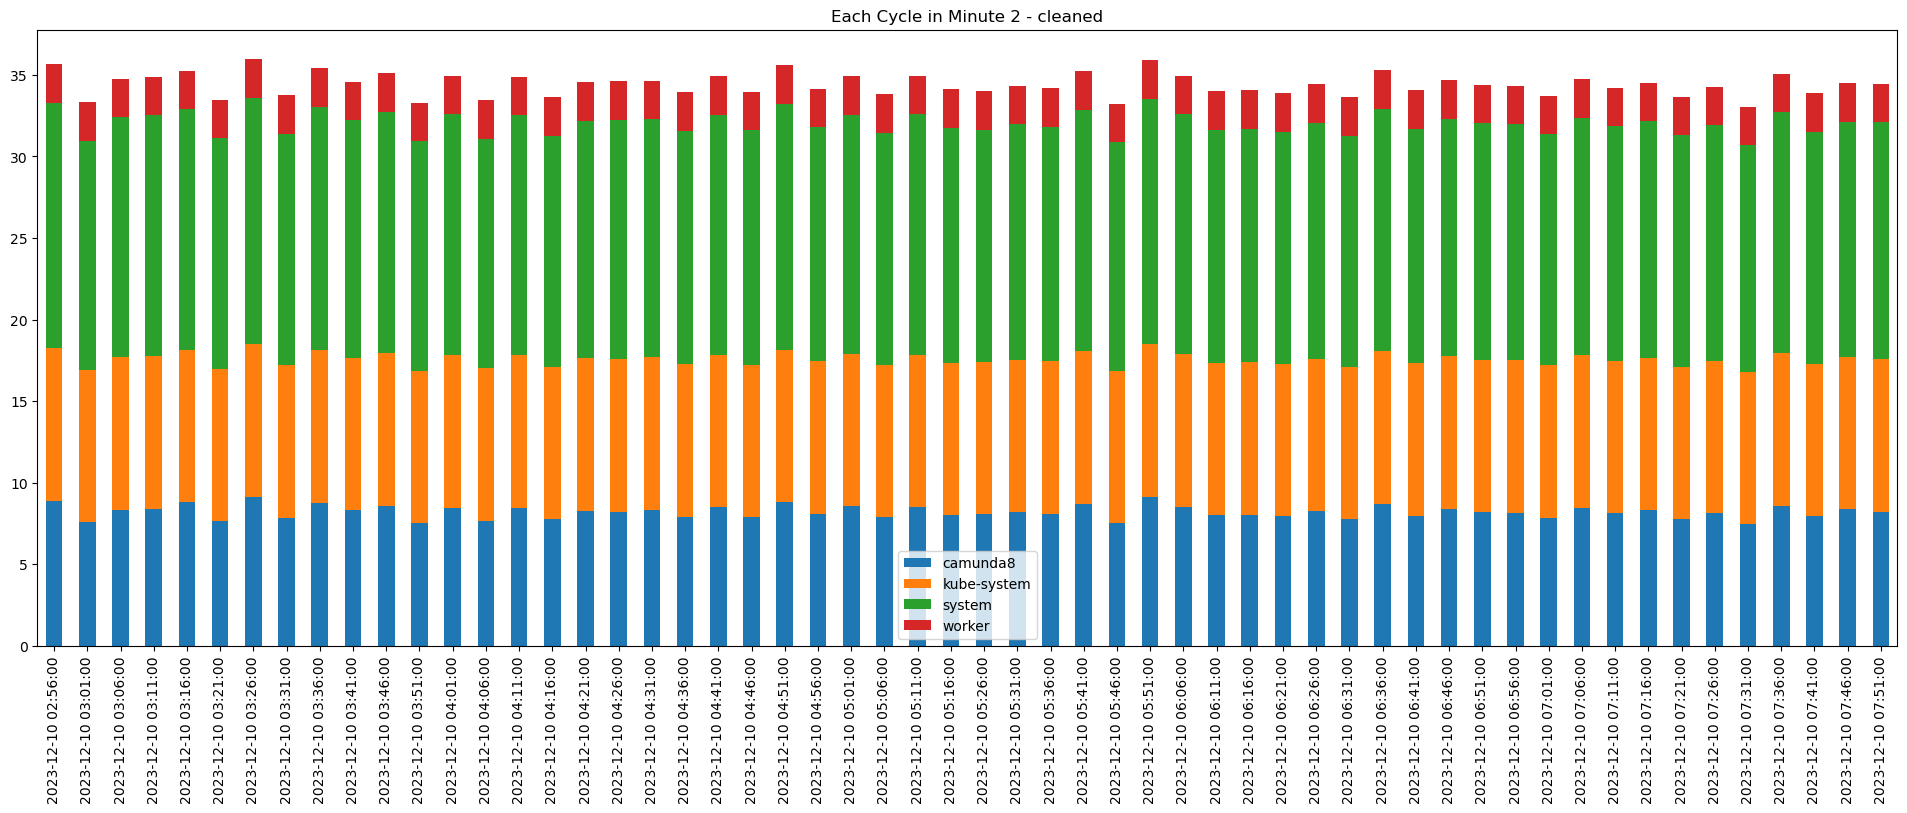

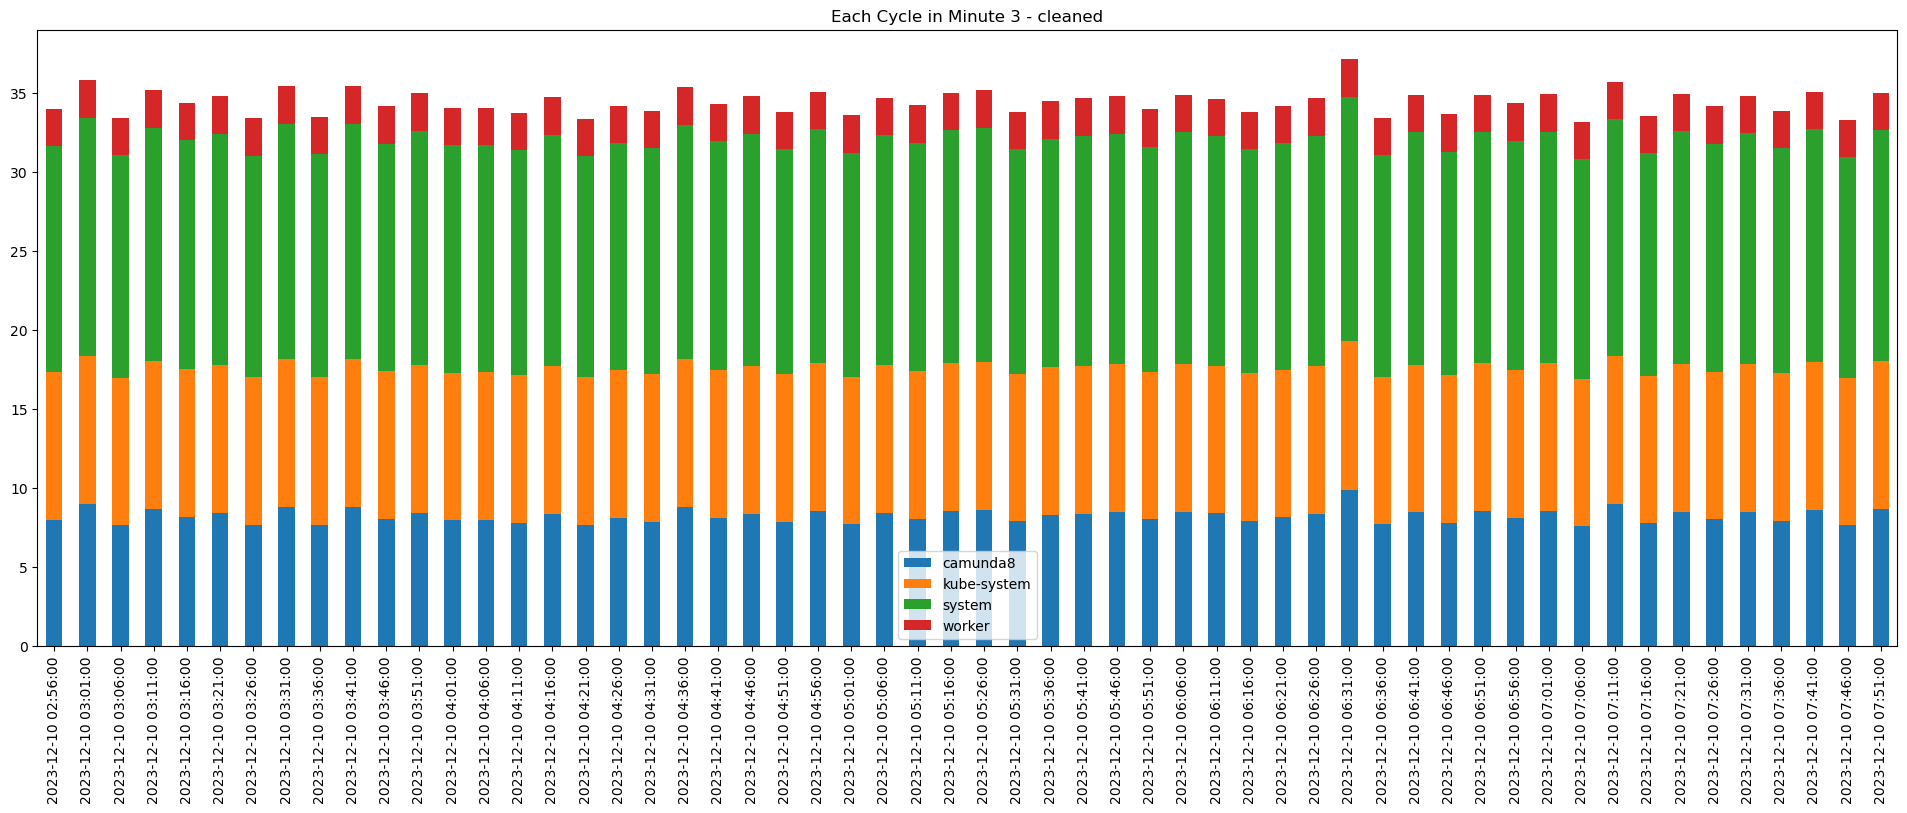

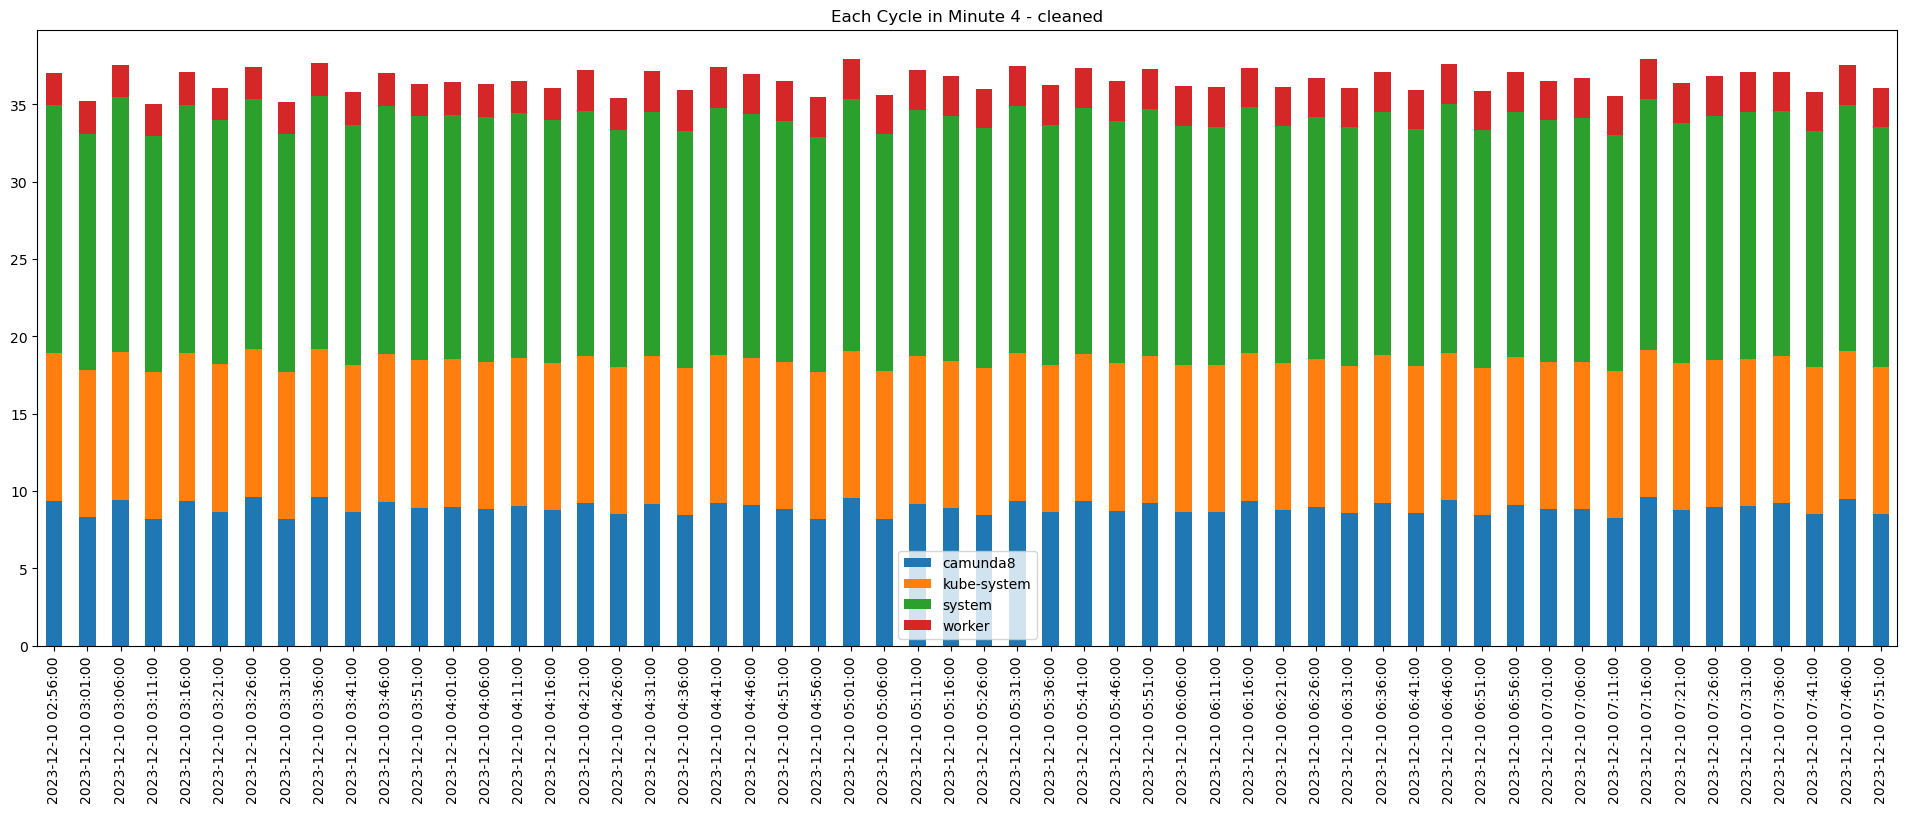

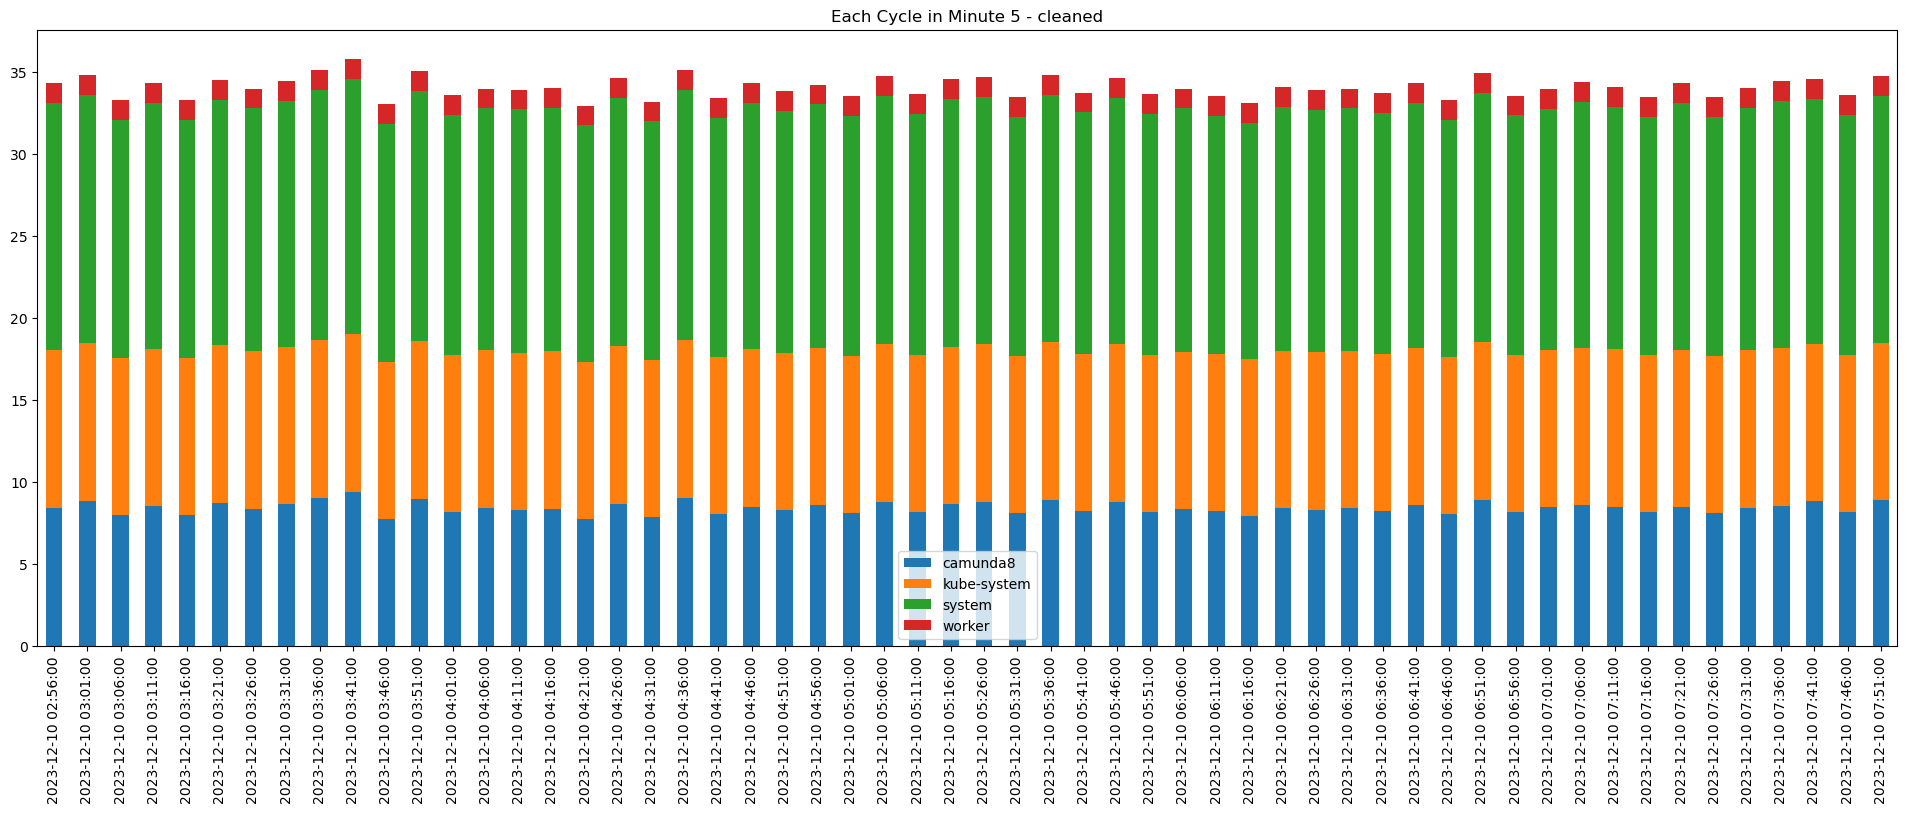

In [282]:
min1_by_namespace = create_min_by_namespace(cycles_by_namespace_clean,1)
min2_by_namespace = create_min_by_namespace(cycles_by_namespace_clean,2)
min3_by_namespace = create_min_by_namespace(cycles_by_namespace_clean,3)
min4_by_namespace = create_min_by_namespace(cycles_by_namespace_clean,4)
min5_by_namespace = create_min_by_namespace(cycles_by_namespace_clean,5)

min1_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 1 - cleaned")
min2_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 2 - cleaned")
min3_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 3 - cleaned")
min4_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 4 - cleaned")
min5_by_namespace.plot(kind='bar', stacked=True, figsize=[24,8], title= "Each Cycle in Minute 5 - cleaned")

<Axes: title={'center': 'System'}, xlabel='Time', ylabel='Consumed Power [W] - cleaned'>

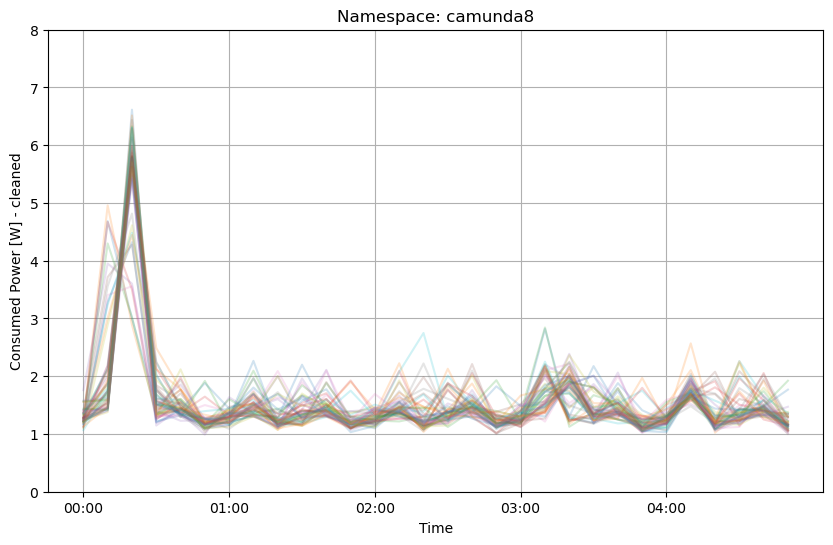

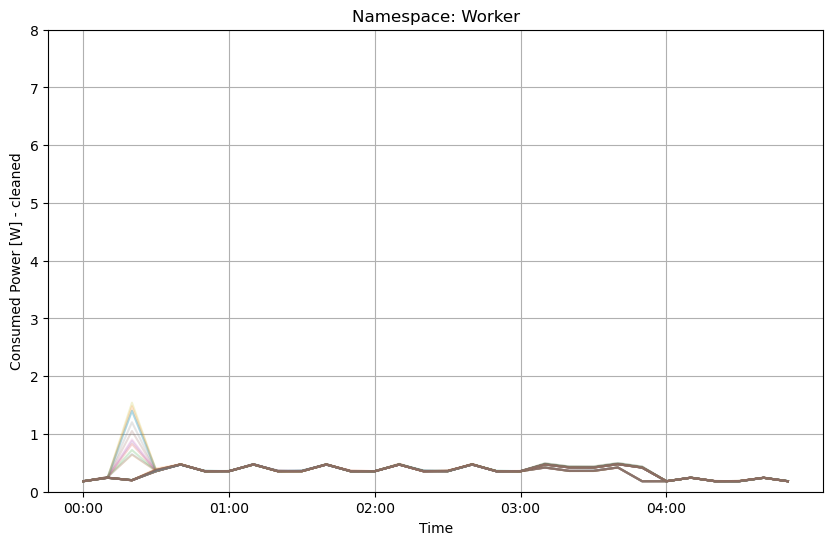

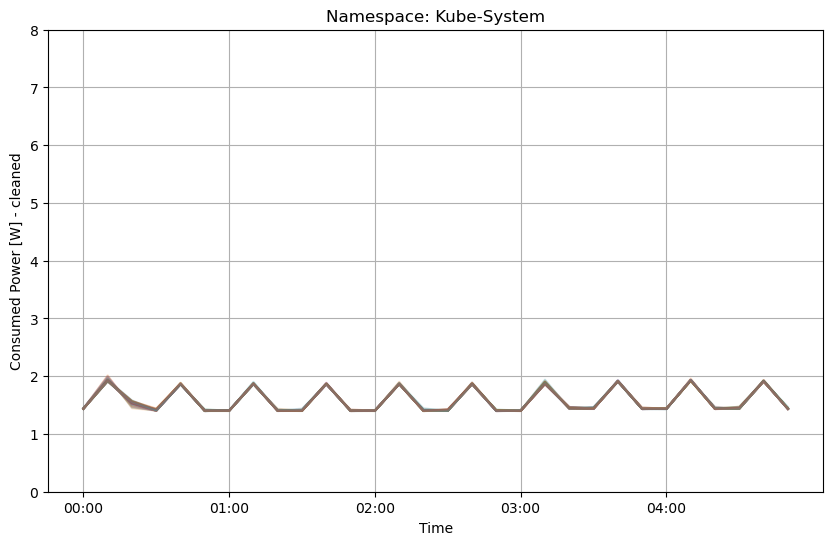

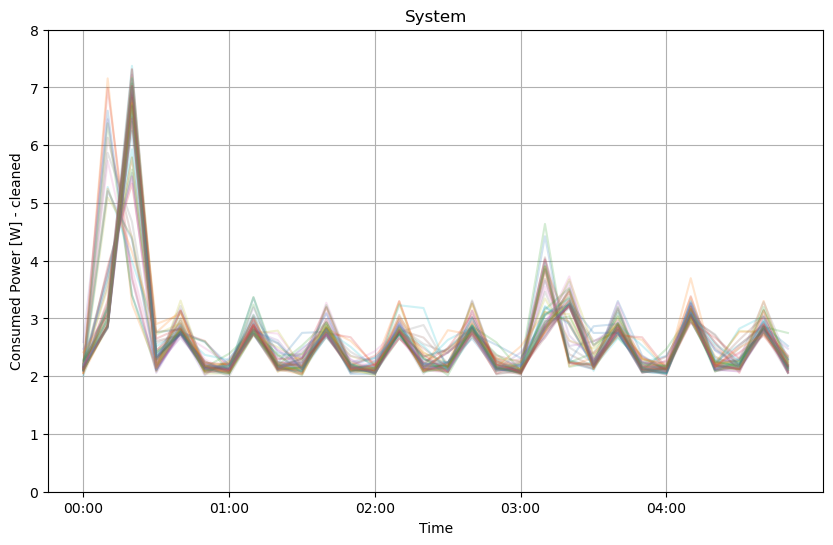

In [283]:
all_camunda_series_clean.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: camunda8", xlabel='Time', ylabel='Consumed Power [W] - cleaned')
all_worker_series_clean.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: Worker", xlabel='Time', ylabel='Consumed Power [W] - cleaned')
all_kube_system_series_clean.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "Namespace: Kube-System", xlabel='Time', ylabel='Consumed Power [W] - cleaned')
all_system_series_clean.plot(legend=False, alpha = alpha, ylim = ylim, figsize = figsize, xticks = x_ticks, grid = grid, title = "System", xlabel='Time', ylabel='Consumed Power [W] - cleaned')

In [284]:
index = [ 'Min1', 'Min2', 'Min3', 'Min4', 'Min5' ]

def create_avg_by_min_series(df, new_index):
    series_avg = df.mean(axis=1)
    temp = pd.Series(index=new_index)
    
    for i in range(0,5):
        temp[i] = series_avg[i * 6 : (i + 1) * 6].sum()

    return temp


avg_by_min = pd.DataFrame(index = index)


avg_by_min['system'] = create_avg_by_min_series(all_system_series_clean, index)
avg_by_min['kube-system'] = create_avg_by_min_series(all_kube_system_series_clean, index)
avg_by_min['camunda8'] = create_avg_by_min_series(all_camunda_series_clean,index)
avg_by_min['worker'] = create_avg_by_min_series(all_worker_series_clean, index)

avg_by_min


,system,kube-system,camunda8,worker
Min1,19.317405,9.588654,13.142321,1.999834
Min2,14.486854,9.354673,8.205839,2.369423
Min3,14.485514,9.354857,8.219991,2.367820
Min4,15.713591,9.529546,8.912264,2.429939
Min5,14.855579,9.605754,8.414280,1.212525


<Axes: title={'center': 'Average Power Consumption by Minute'}, ylabel='Avg Consumed Power [W/Min]'>

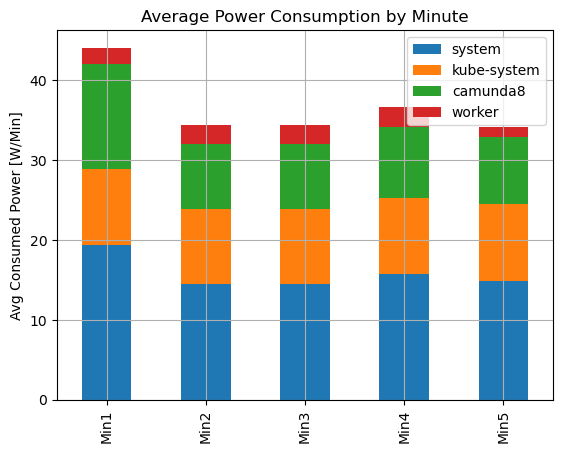

In [285]:
# plot average consumption per minute
# ylim=[0,8] 
figsize = [10,6]
alpha=0.2
grid=True

avg_by_min.plot(
    kind="bar",
    stacked=True,
    title = 'Average Power Consumption by Minute',
    grid=True,
    ylabel='Avg Consumed Power [W/Min]'
)

In [286]:
avg_idle = min5_by_namespace.mean(axis=0)

avg_idle


camunda8        8.414280
kube-system     9.605754
system         14.855579
worker          1.212525
dtype: float64

In [287]:
## checking amount of workers
cycles_min_1_4 = []
is_correct_amt_of_workers = True

for item in cycles:
    
    df = pd.DataFrame(item.iloc[0:24,:])
    df = df.loc[:,[col for col in item.columns if 'restworkerjava' in col]]
    df = df.dropna(how="all", axis=1)

    cycles_min_1_4.append(df)

for item in cycles_min_1_4:
    if len(item.columns) != 4:
        is_correct_amt_of_workers = False

is_correct_amt_of_workers  

True

In [288]:
# verifying Min5 only has 1 Worker

cycles_min5 = []
is_correct_amt_of_workers = True

for item in cycles:
    temp = pd.DataFrame(item.iloc[24:30,:])
    temp = temp.loc[:,[col for col in item.columns if 'restworkerjava' in col]]
    temp = temp.dropna(how="all", axis=1)
    cycles_min5.append(temp)

for item in cycles_min5:
    if len(item.columns) != 2:
        is_correct_amt_of_workers = False

is_correct_amt_of_workers

True

### Calculating Idle

**Min5** is running 1 worker, so this will serve as a baseline. Since no operations are being done in 'kube-system' and 'system', disregard namespaces for Idle. **only 'worker' and 'zeebe' remain.**

<Axes: title={'center': 'Difference Avg Min 2-3 to Min 5'}>

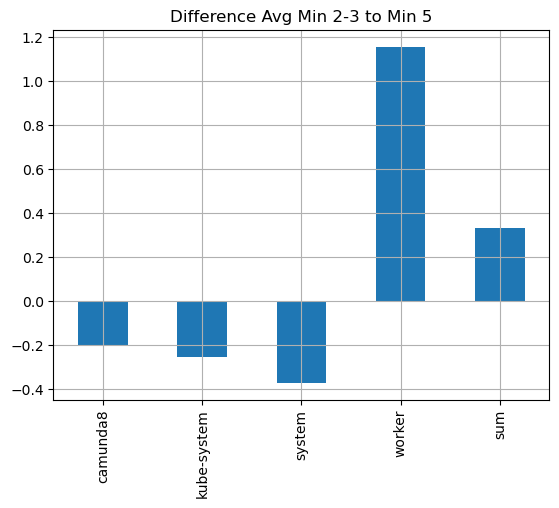

In [289]:
min2_3 = avg_by_min['Min2':'Min3']
min2_3 = min2_3.transpose()

min2_3_avg = min2_3.mean(axis=1)

# min2_3_avg

diff_idle =  avg_by_min['Min2':'Min3'].mean(axis=0) - avg_idle
diff_idle['sum'] = diff_idle.sum(axis=0)

diff_idle.plot(kind="bar", grid=True, title="Difference Avg Min 2-3 to Min 5")

# Calculating Start-Up